In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import squarify
from pywaffle import Waffle
import plotly.express as px
import plotly.graph_objs as go
from sklearn.preprocessing import MinMaxScaler
import h5py
import joblib

In [2]:
# Load the cleaned data
df = pd.read_csv('cleaned_data.csv')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

In [3]:
# Data Preprocessing
df.fillna('', inplace=True)  # Fill missing values
scaler = MinMaxScaler()
df[['audienceScore', 'tomatoMeter', 'sentiment_score']] = scaler.fit_transform(
    df[['audienceScore', 'tomatoMeter', 'sentiment_score']]
)

In [4]:
# Split the genre column into multiple columns, dynamically based on the maximum number of genres
genres_split = df['genre'].str.split(',', expand=True)
genres_split.columns = [f'genre_{i+1}' for i in range(genres_split.shape[1])]

# Split the ratingContents column into multiple columns, dynamically based on the maximum number of contents
rating_contents_split = df['ratingContents'].str.split(',', expand=True)
rating_contents_split.columns = [f'ratingContent_{i+1}' for i in range(rating_contents_split.shape[1])]

# Concatenate the original dataframe with the new genre and rating content columns
df = pd.concat([df, genres_split, rating_contents_split], axis=1)

# Convert genre and rating content columns to categorical data type (without encoding to integers)
for col in genres_split.columns:
    df[col] = df[col].astype('category')

for col in rating_contents_split.columns:
    df[col] = df[col].astype('category')


In [5]:
# Create the combined_features column by concatenating all genre and rating content columns
df['combined_features'] = df[genres_split.columns.tolist() + rating_contents_split.columns.tolist()].astype(str).apply(lambda x: ' '.join(x), axis=1) + " " + df['rating']

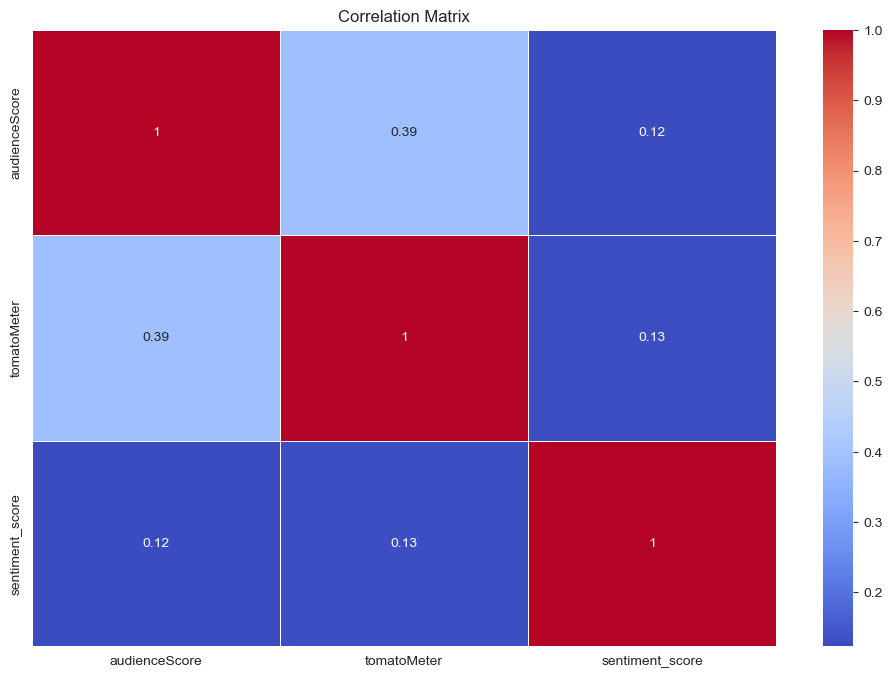

In [6]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[['audienceScore', 'tomatoMeter', 'sentiment_score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

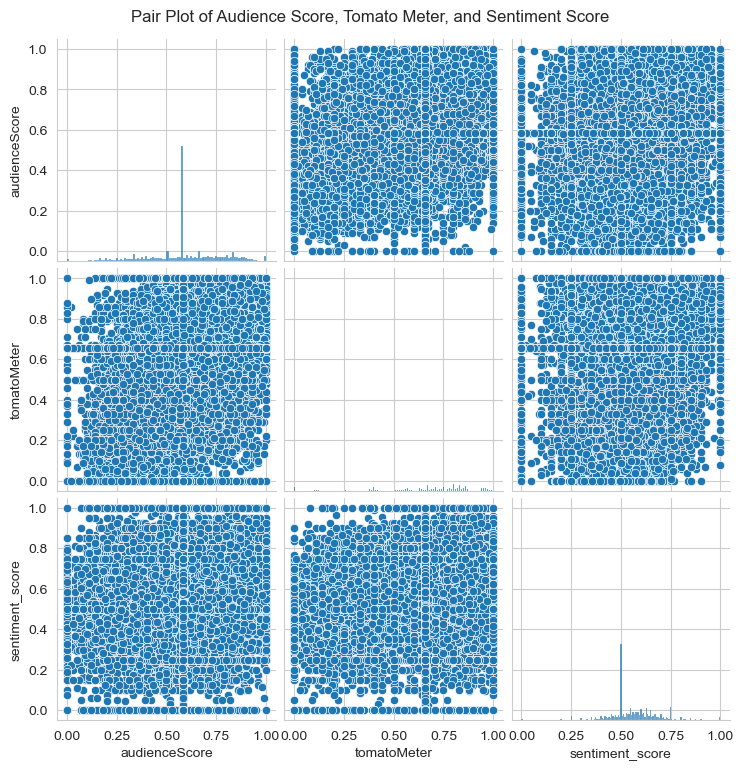

In [7]:
sns.pairplot(df[['audienceScore', 'tomatoMeter', 'sentiment_score']])
plt.suptitle("Pair Plot of Audience Score, Tomato Meter, and Sentiment Score", y=1.02)
plt.show()


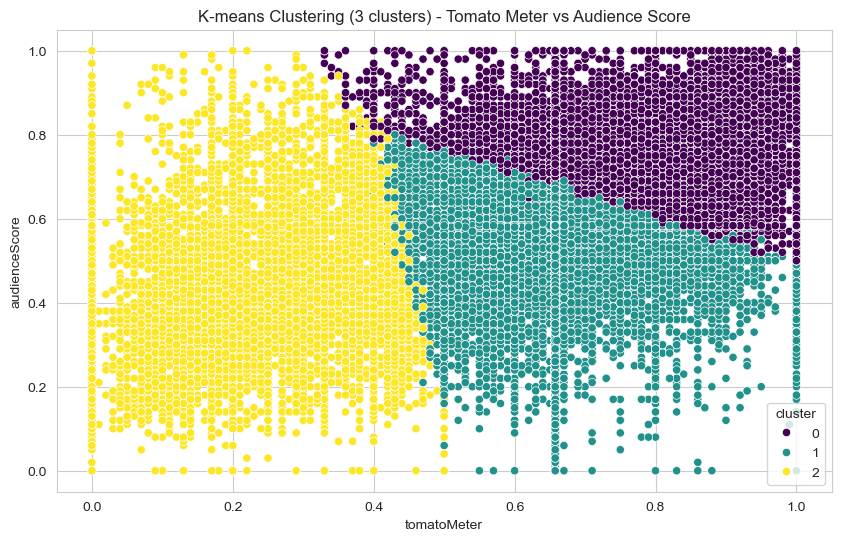

In [8]:
from sklearn.cluster import KMeans

# Selecting relevant features for clustering
X = df[['tomatoMeter', 'audienceScore', 'sentiment_score']]

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tomatoMeter', y='audienceScore', hue='cluster', data=df, palette='viridis')
plt.title('K-means Clustering (3 clusters) - Tomato Meter vs Audience Score')
plt.show()



/var/folders/c3/sr79zb3j1nx_lsk2ps2tbhl80000gn/T/ipykernel_17984/1040510286.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='sentiment_score', data=df, palette='coolwarm')


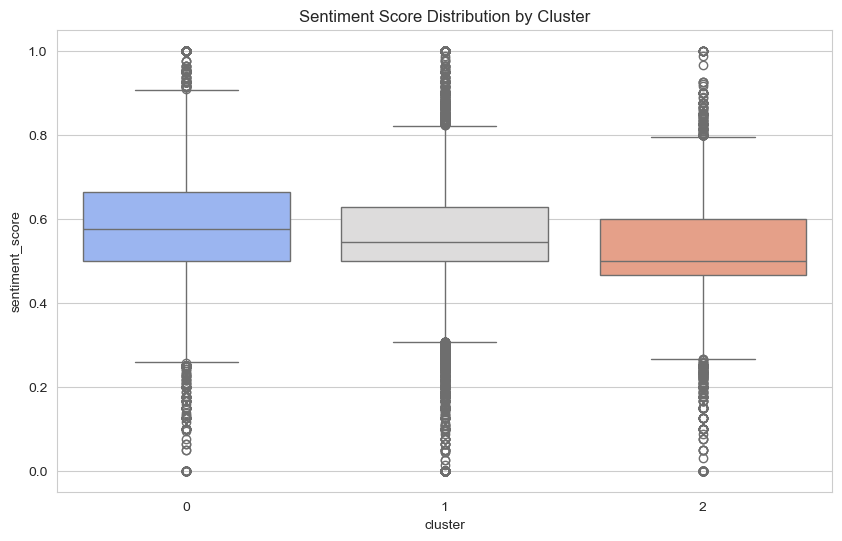

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='sentiment_score', data=df, palette='coolwarm')
plt.title('Sentiment Score Distribution by Cluster')
plt.show()


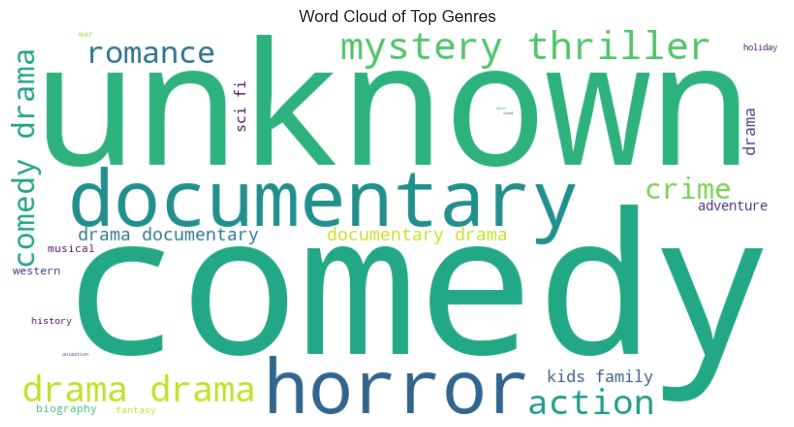

In [10]:
from wordcloud import WordCloud

# Create a string of all the genres
all_genres = ' '.join(df['genre_1'].astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Genres')
plt.show()


/var/folders/c3/sr79zb3j1nx_lsk2ps2tbhl80000gn/T/ipykernel_17984/3229701747.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='genre_1', y='audienceScore', data=df, palette='Set2')


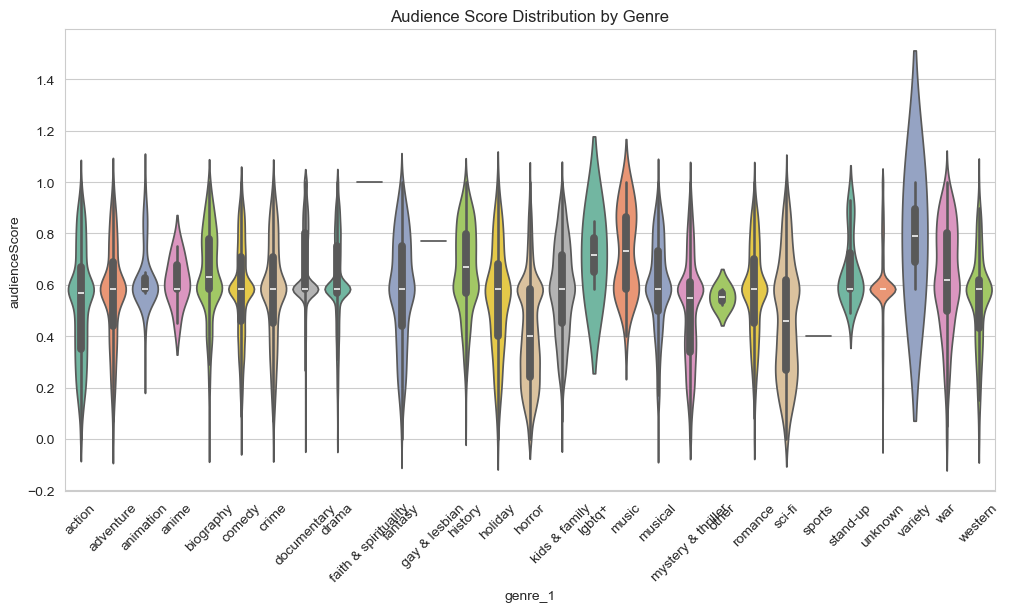

In [11]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='genre_1', y='audienceScore', data=df, palette='Set2')
plt.title('Audience Score Distribution by Genre')
plt.xticks(rotation=45)
plt.show()


/var/folders/c3/sr79zb3j1nx_lsk2ps2tbhl80000gn/T/ipykernel_17984/2805249422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre_1', y='tomatoMeter', data=df, palette='muted')


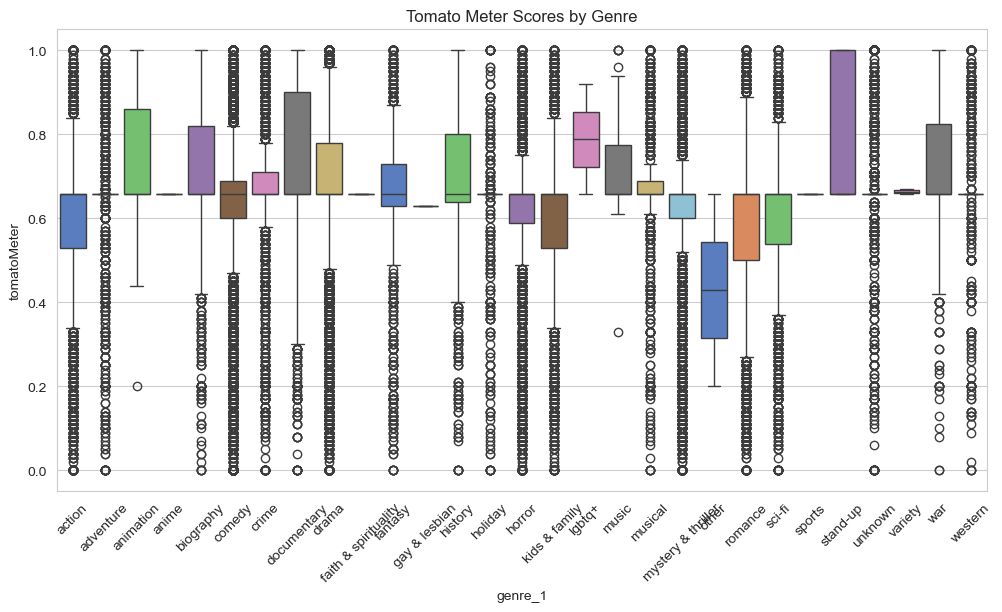

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre_1', y='tomatoMeter', data=df, palette='muted')
plt.title('Tomato Meter Scores by Genre')
plt.xticks(rotation=45)
plt.show()


/var/folders/c3/sr79zb3j1nx_lsk2ps2tbhl80000gn/T/ipykernel_17984/1164906895.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre_1', y='audienceScore', data=df, palette='Set3')


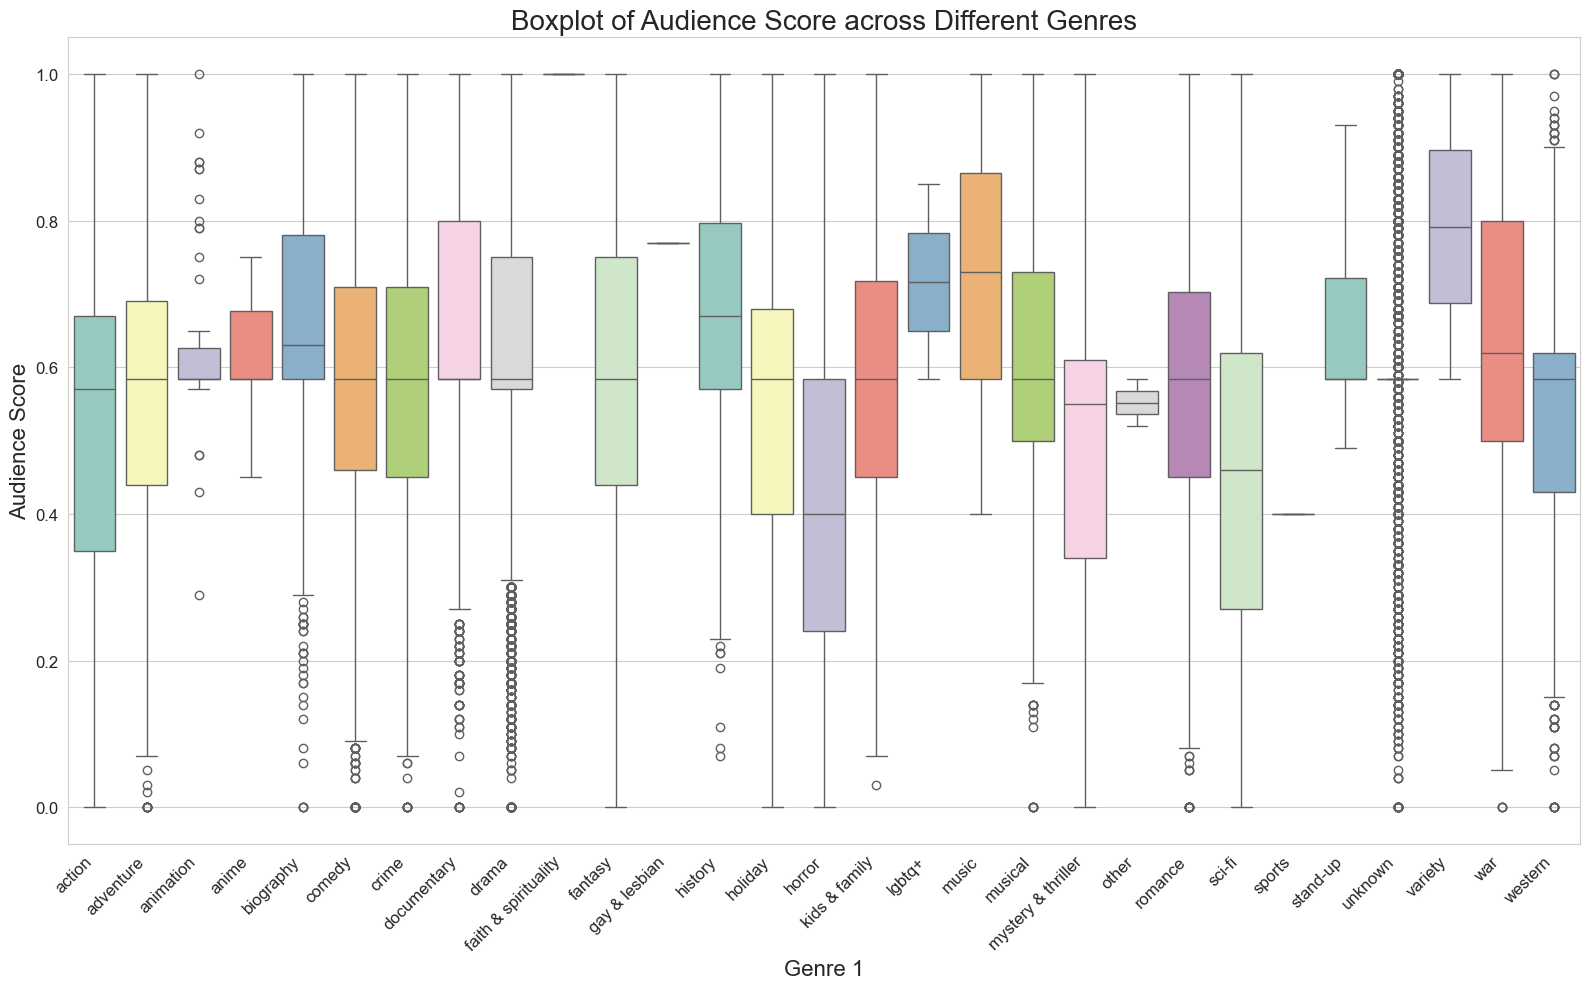

In [13]:
# 8. Enhanced Boxplot of Audience Score across Different Genres with Improved Labels
plt.figure(figsize=(16, 10))  # Increase figure size
sns.boxplot(x='genre_1', y='audienceScore', data=df, palette='Set3')

# Customize plot
plt.title('Boxplot of Audience Score across Different Genres', fontsize=20)  # Title with increased font size
plt.xlabel('Genre 1', fontsize=16)  # X-axis label
plt.ylabel('Audience Score', fontsize=16)  # Y-axis label
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)  # Increase font size for y-axis labels

# Display the plot
plt.tight_layout()
plt.show()


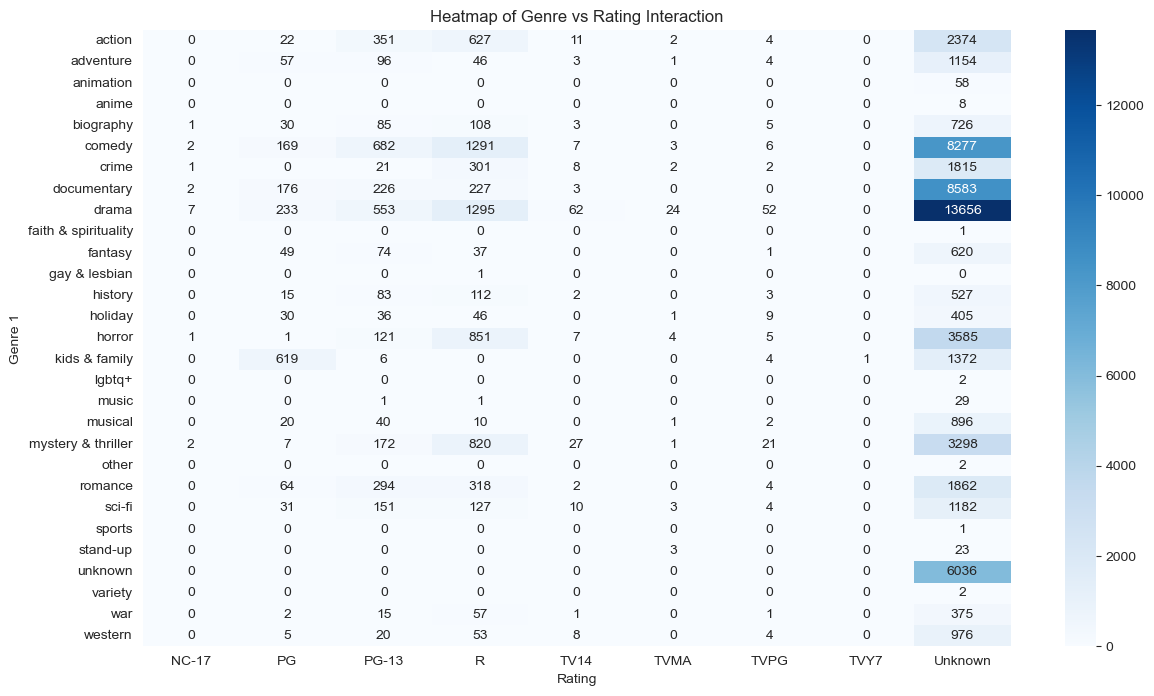

In [14]:
# 13. Heatmap of Genre vs Rating Interaction
genre_rating_cross = pd.crosstab(df['genre_1'], df['rating'])
plt.figure(figsize=(14, 8))
sns.heatmap(genre_rating_cross, annot=True, cmap='Blues', fmt='g')
plt.title('Heatmap of Genre vs Rating Interaction')
plt.xlabel('Rating')
plt.ylabel('Genre 1')
plt.show()

/var/folders/c3/sr79zb3j1nx_lsk2ps2tbhl80000gn/T/ipykernel_17984/2915911637.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='releaseYear', y='audienceScore', data=df, label='Audience Score', ci=None)
/var/folders/c3/sr79zb3j1nx_lsk2ps2tbhl80000gn/T/ipykernel_17984/2915911637.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='releaseYear', y='tomatoMeter', data=df, label='Tomato Meter', ci=None)
/var/folders/c3/sr79zb3j1nx_lsk2ps2tbhl80000gn/T/ipykernel_17984/2915911637.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='releaseYear', y='sentiment_score', data=df, label='Sentiment Score', ci=None)


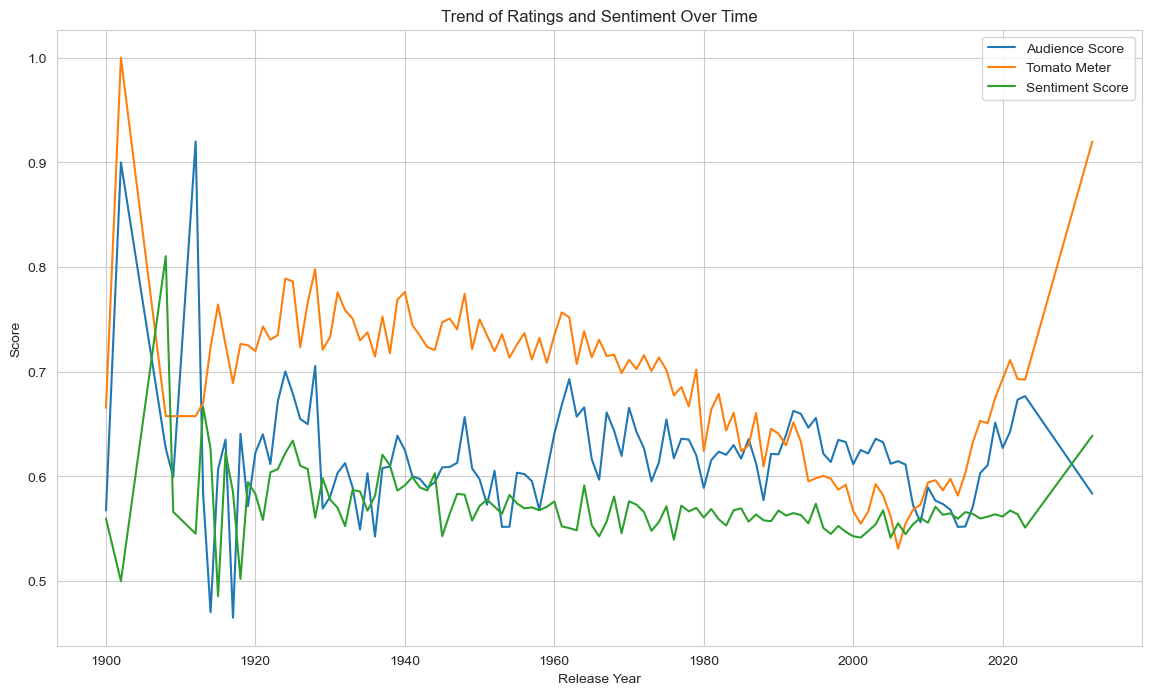

In [15]:
# Trend of ratings and sentiment over time
plt.figure(figsize=(14, 8))
sns.lineplot(x='releaseYear', y='audienceScore', data=df, label='Audience Score', ci=None)
sns.lineplot(x='releaseYear', y='tomatoMeter', data=df, label='Tomato Meter', ci=None)
sns.lineplot(x='releaseYear', y='sentiment_score', data=df, label='Sentiment Score', ci=None)
plt.title('Trend of Ratings and Sentiment Over Time')
plt.xlabel('Release Year')
plt.ylabel('Score')
plt.legend()
plt.show()

/var/folders/c3/sr79zb3j1nx_lsk2ps2tbhl80000gn/T/ipykernel_17984/165437042.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['audienceScore'], shade=True, color='blue', label='Audience Score')
/var/folders/c3/sr79zb3j1nx_lsk2ps2tbhl80000gn/T/ipykernel_17984/165437042.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['tomatoMeter'], shade=True, color='red', label='Tomato Meter')
/var/folders/c3/sr79zb3j1nx_lsk2ps2tbhl80000gn/T/ipykernel_17984/165437042.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['sentiment_score'], shade=True, color='green', label='Sentiment Score')


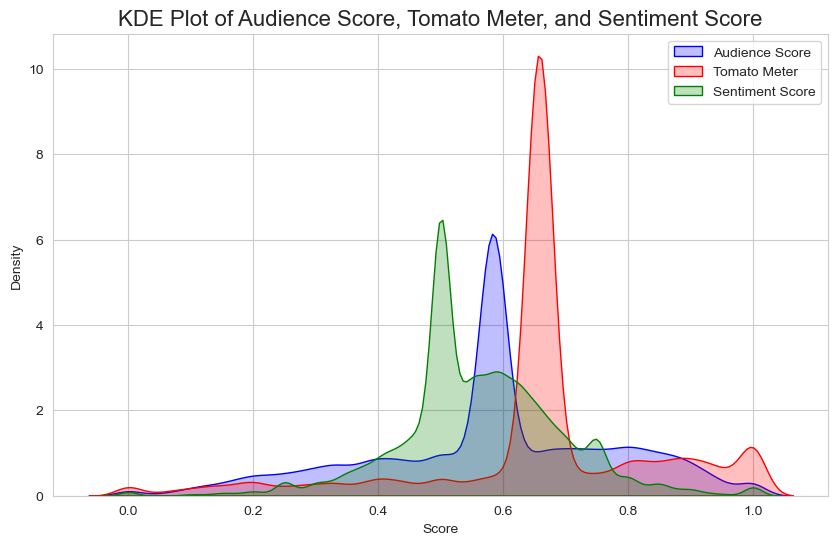

In [16]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot KDE for audienceScore
sns.kdeplot(df['audienceScore'], shade=True, color='blue', label='Audience Score')

# Plot KDE for tomatoMeter
sns.kdeplot(df['tomatoMeter'], shade=True, color='red', label='Tomato Meter')

# Plot KDE for sentiment_score
sns.kdeplot(df['sentiment_score'], shade=True, color='green', label='Sentiment Score')

# Add labels and title
plt.title('KDE Plot of Audience Score, Tomato Meter, and Sentiment Score', fontsize=16)
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()
